In [18]:
import json
import pandas as pd
import C2Analyse
import matplotlib.pyplot as plt

In [19]:
df_athletes = C2Analyse.load_C2scrape_data("output/C2Athletes.json")
df_athletes.index.set_names("profile_id", inplace=True)
df_extended = C2Analyse.load_C2scrape_data("output/C2Extended.json")
df_extended.index.set_names("workout_id", inplace=True)
df_workouts = C2Analyse.load_C2scrape_data("output/C2Workouts.json")
df_workouts.index.set_names("workout_id", inplace=True)

In [20]:
# print(df_athletes)

In [21]:
# print(df_extended)

In [22]:
# print(df_workouts)

In [23]:
#get basic stats:

print(f"Number of workouts: {len(df_workouts)}")
print(f"Number of athletes: {len(df_athletes)}")
print(f"Number of extended workout data: {len(df_extended)}")

print("Indoor rowing machine, workouts by event:")
df_workouts_by_year_event = df_workouts[(df_workouts["rower"] == "rower") & (df_workouts["machine"] == "rower")][["event","year"]].value_counts()

print(df_workouts_by_year_event)
#need to convert years to columns

Number of workouts: 331944
Number of athletes: 81027
Number of extended workout data: 331747
Indoor rowing machine, workouts by event:
event   year
5000    2021    20350
2000    2021    18794
        2020    16457
5000    2020    15565
10000   2021    15163
2000    2019    15071
1000    2020    12796
30      2021    12668
5000    2019    12346
1000    2021    11007
10000   2020    10657
1000    2019    10556
30      2020    10468
500     2021     8749
        2020     8604
10000   2019     8436
30      2019     7659
500     2019     7061
6000    2021     6914
1       2021     6411
21097   2021     6239
6000    2020     5302
60      2021     5200
100     2021     4398
21097   2020     4144
60      2020     3874
6000    2019     3294
100     2020     3247
21097   2019     3225
60      2019     3043
100     2019     2797
1       2020     2680
4       2021     2636
1       2019     2473
4       2020     2355
42195   2021     1810
4       2019     1493
42195   2020     1265
        2019    

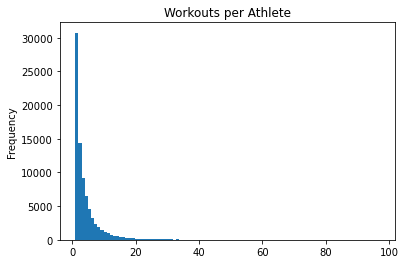

In [25]:
df_athletes_workouts = pd.merge(left=df_workouts, right=df_athletes, left_on='profile_id', right_on="profile_id", right_index=True)

#why are there less rows than workouts? Did we fail to get some athlete profiles? Can do an outer merge to find ones with empty profile data and check. Maybe profiles deleted xmax=20 xticks=range(0,xmax,2)

df_aw_count = df_athletes_workouts["profile_id"].value_counts()

bins = df_aw_count[0].max() #set bin size to 1
df_aw_count_plot = df_aw_count.plot(kind="hist", bins=bins, title="Workouts per Athlete")

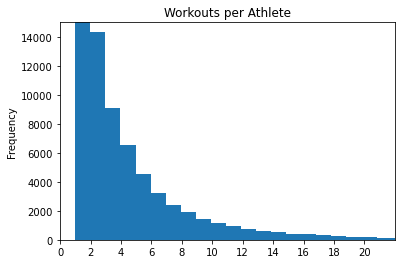

In [26]:
ymax = 15000
xmax = 22
num_ticks = 10
xticks=range(0,xmax,int(round(xmax/num_ticks,0)))
df_aw_count_plot = df_aw_count.plot(kind="hist", bins=bins, title="Workouts per Athlete", ylim=[0,ymax], xlim=[0,xmax], xticks=xticks)